<a href="https://colab.research.google.com/github/cjmcneil/audio-restorer/blob/main/AudioRestorer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1. IMPORT STATEMENTS

In [1]:
#!pip install librosa

In [2]:
#Audio Data Processing in Python - https://www.youtube.com/watch?v=ZqpSb5p1xQo
#All code in Steps 1, 3, and 4 is from this video. 
#I'll go back and fine tune it in the edit!

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal=plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle=cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

#import noise_reducer

In [3]:
#Get dataset from Google Drive
path_to_training_data='/content/drive/MyDrive/Static_Dataset'
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#List all the files in our training dataset
training_files = glob('/content/drive/MyDrive/Static_Dataset/*.mp3')

In [5]:
print(training_files[0])

/content/drive/MyDrive/Static_Dataset/520147__f-r-a-g-i-l-e__original-vinyl-static-rustling.mp3


In [6]:
#Play first training sound
ipd.Audio(training_files[0])

In [7]:
#Reads in the actual audio file
y, sr = librosa.load(training_files[0]) 
#'y' is raw data of audio file, 'sr' is integer value of sample rate

In [8]:
#Print out y and sr
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y: [-2.3283064e-10 -2.3283064e-10  3.4924597e-10 -1.0477379e-09
 -1.1641532e-10 -9.3132257e-10  0.0000000e+00  9.3132257e-10
  9.3132257e-10  9.3132257e-10]
shape y: (604224,)
sr: 22050


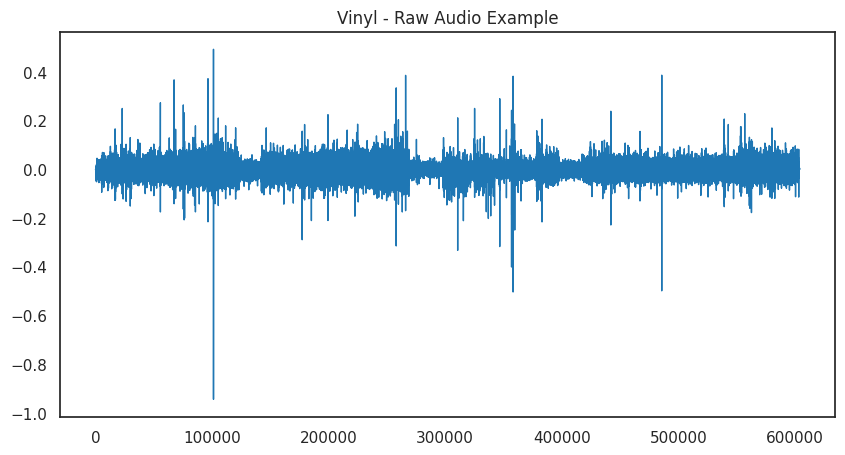

In [9]:
#Create Pandas series of raw audio data
pd.Series(y).plot(figsize=(10,5), 
                  lw=1, 
                  title='Vinyl - Raw Audio Example')
plt.show()

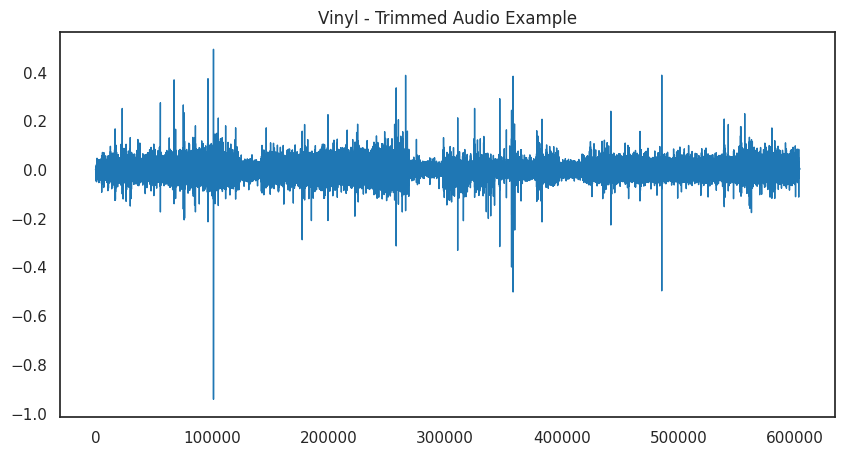

In [10]:
y_trimmed, _ = librosa.effects.trim(y, top_db=200000)

pd.Series(y_trimmed).plot(figsize=(10,5), 
                  lw=1, 
                  title='Vinyl - Trimmed Audio Example')
plt.show()

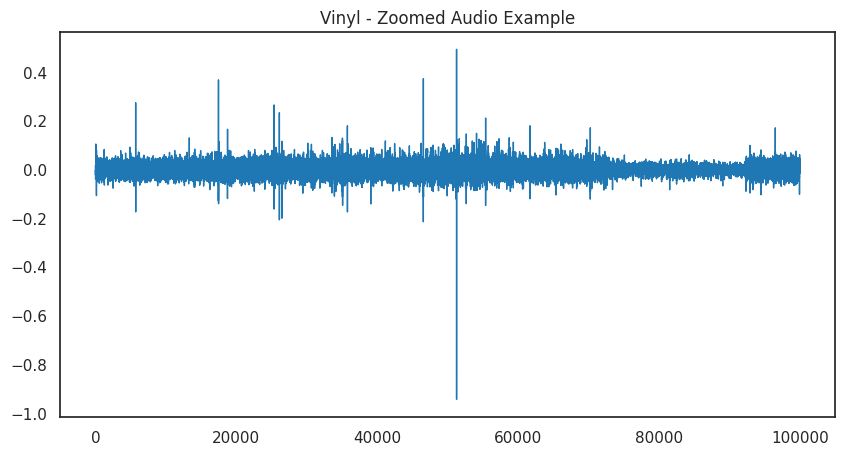

In [11]:
#Zoomed in between x=50000 - 150000
pd.Series(y[50000:150000]).plot(figsize=(10,5), 
                  lw=1, 
                  title='Vinyl - Zoomed Audio Example')
plt.show()

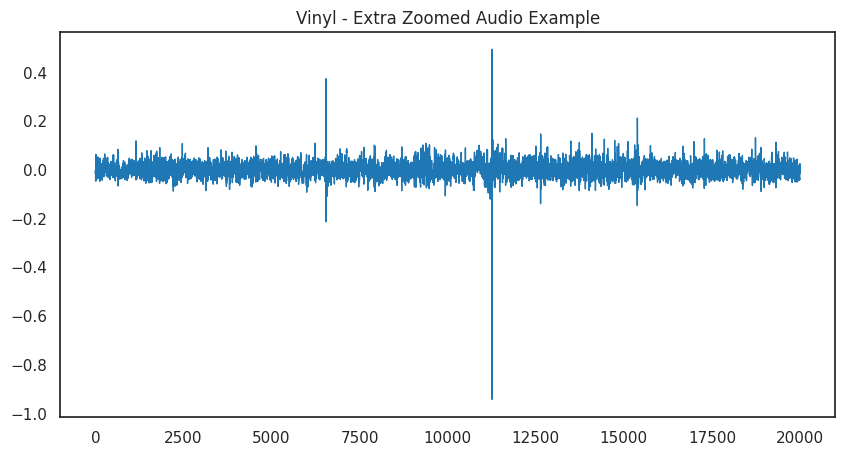

In [12]:
#Zoomed in between x=90000 - 110000
pd.Series(y[90000:110000]).plot(figsize=(10,5), 
                  lw=1, 
                  title='Vinyl - Extra Zoomed Audio Example')
plt.show()

Step 2. CREATE FUNCTION TO GENERATE **MFCC** ARRAY FROM AUDIO

Step 3. CREATE FUNCTION TO GENERATE MEL SPECTROGRAM FROM AUDIO

In [18]:
#EXAMPLE
#This is a MEL (melodic) Spectrogram
S = librosa.feature.melspectrogram(y=y,
                               sr=sr,
                               n_mels=128,)
S_db_mel = librosa.amplitude_to_db(np.abs(S), ref=np.max)
S.shape

(128, 1181)

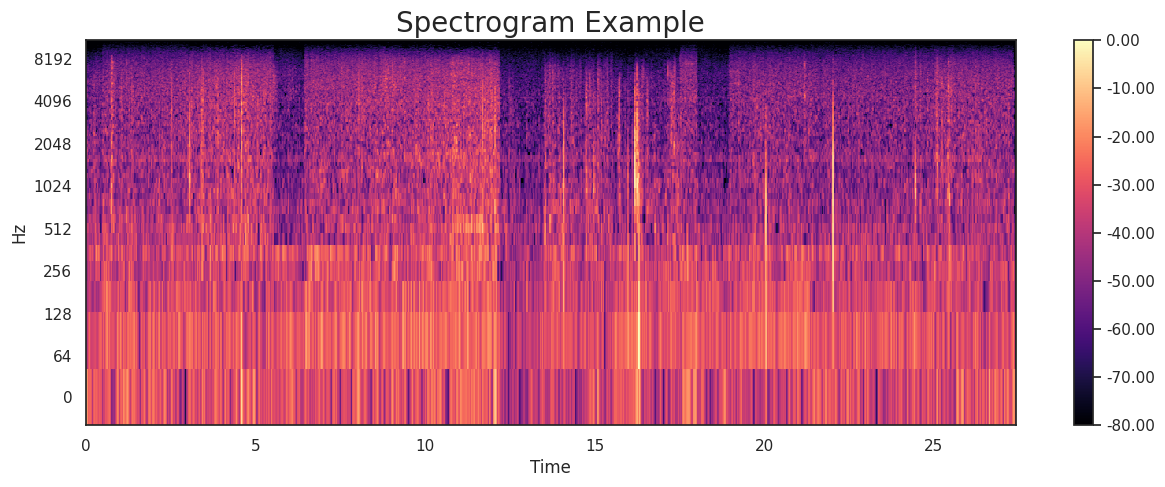

In [15]:
#Plot the transformed audio data
fig, ax = plt.subplots(figsize=(15, 5))
img = librosa.display.specshow(S_db_mel,
                               x_axis='time',
                               y_axis='log',
                               ax=ax)
ax.set_title('Spectrogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [ ]:
# FUNCTION

Step 4. CREATE FUNCTION TO GENERATE CHROMA **STFT** ARRAY FROM AUDIO

In [16]:
#EXAMPLE
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 1181)

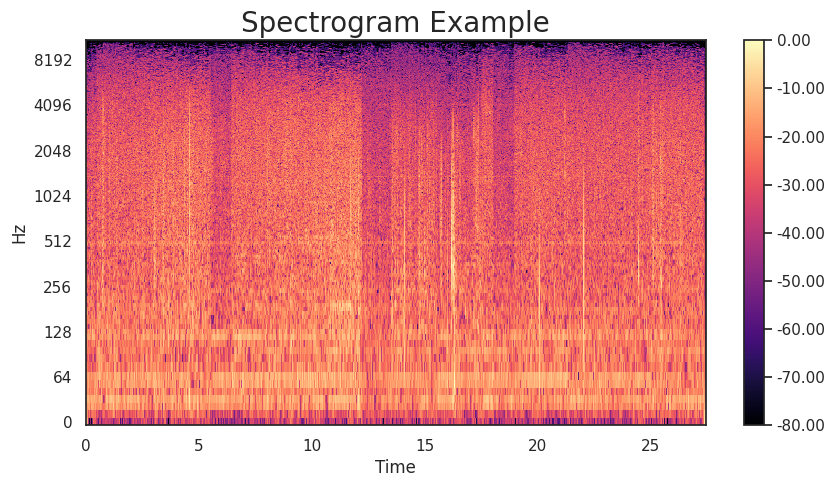

In [17]:
#Plot the transformed audio data
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,
                               x_axis='time',
                               y_axis='log',
                               ax=ax)
ax.set_title('Spectrogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [ ]:
#FUNCTION

Step 5. CREATE FUNCTION TO GENERATE CHROMA **CENS** FROM AUDIO

Step 6. CREATE FUNCTION TO GENERATE FEATURE MATRICES (A1-A5) FROM AUDIO

Step 7. ITERATE THROUGH FEATURE MATRICES, STORING THEM IN A LIST

Step 8. ONE-HOT ENCODING

Step 9. CREATE FUNCTION TO CREATE AND COMPILE THE MODEL

Step 10. CREATE FUNCTION TO TRAIN THE MODEL

Step 11. CALL THE RESPECTIVE FUNCTIONS TO CREATE AND TRAIN THE MODEL, AND THEN SAVE THE TRAINED MODEL TO A FILE

Step 12. CREATE A FUNCTION TO LOAD THE TRAINED MODEL

Step 13. LOAD THE TRAINED MODEL

Step 14. CREATE FUNCTION TO REMOVE NOISE FROM AUDIO USING NOISE REDUCER LIBRARY

Step 15. CALL NOISE REDUCER FUNCTION FOR EACH NOISE CLASS